In [1]:
%matplotlib inline

In [2]:
import itertools
import math
import time

import torch
import torchvision
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from IPython import display
from torch.autograd import Variable

## Load Generator

In [6]:
hidden = 15
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(hidden, 30, bias = False),
            nn.ReLU(inplace=True),
            nn.Linear(30, 50, bias = False),
            nn.ReLU(inplace=True),
            nn.Linear(50, 100, bias = False),
            nn.ReLU(inplace=True),
            nn.Linear(100, 784, bias = False),
            nn.Tanh()
        )
    
    def forward(self, x):
        x = x.view(x.size(0), hidden)
        out = self.model(x)
        return out

In [8]:
generator = Generator()
generator.load_state_dict(torch.load('trained_gan.pt' ,map_location='cpu'))
generator.eval()

Generator(
  (model): Sequential(
    (0): Linear(in_features=15, out_features=30, bias=False)
    (1): ReLU(inplace)
    (2): Linear(in_features=30, out_features=50, bias=False)
    (3): ReLU(inplace)
    (4): Linear(in_features=50, out_features=100, bias=False)
    (5): ReLU(inplace)
    (6): Linear(in_features=100, out_features=784, bias=False)
    (7): Tanh()
  )
)

In [9]:
# freeze weigths
def froze_weights(net):
    for param in net.parameters():
        param.requires_grad = False

In [10]:
froze_weights(generator)

## Projection Step

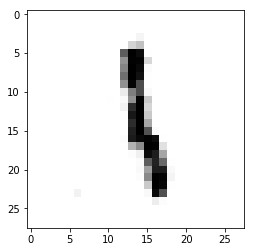

In [65]:
xstar = torch.randn([1,hidden])
img_star = generator(xstar)
plt.imshow(img_star.detach().numpy().reshape(28,28),  cmap='Greys')

In [67]:
gamma = 0.0007;
steps = 2000;
init = 7
min_loss = 10000;
xmin     = 0;

Init:  1 
loss:  2.9624317
|x^star - xk| 3.0654876

Init:  2 
loss:  8.35383
|x^star - xk| 3.4565518

Init:  3 
loss:  43.60634
|x^star - xk| 4.3249865

Init:  4 
loss:  11.206227
|x^star - xk| 4.381526

Init:  5 
loss:  38.692448
|x^star - xk| 5.2707314

Init:  6 
loss:  8.009797
|x^star - xk| 3.1182039

Init:  7 
loss:  8.518957
|x^star - xk| 4.4207287



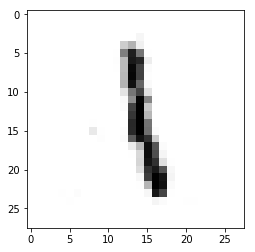

In [68]:
for j in range(init):
    xk = Variable(torch.randn(xstar.size()), requires_grad=True)
    for i in range(steps):
        Gxk = generator(xk);
        l2_loss_var = ((Gxk-img_star).norm())**2
        l2_loss_var.backward()
        xk.data -= gamma*xk.grad.data
        xk.grad.data.zero_();
    print('Init: ', j+1, '\nloss: ', l2_loss_var.detach().numpy());
    print('|x^star - xk|', (xstar-xk).norm().detach().numpy());
    print()
    if(l2_loss_var < min_loss):
        xmin = xk
        
pct_min = generator(xmin)
plt.imshow(pct_min.detach().numpy().reshape(28,28),  cmap='Greys')

In [78]:
# Dataset
DOWNLOAD = False
SHUFFLE_TR = True
SHUFFLE_TS = False

# Architecture
num_features = 784
num_hidden_1 = 32
random_seed  = 123

# Training
batch_size = 28
learning_rate = 0.005
num_epochs = 6

# Data
image_width = 28

In [79]:
import torch
import torch.nn.functional as F
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
import random

In [80]:
DOWNLOAD = False

# Note transforms.ToTensor() scales input images to 0-1 range
train_dataset = datasets.MNIST(root='data', 
                               train=True, 
                               transform=transforms.ToTensor(),
                               download=DOWNLOAD)

test_dataset = datasets.MNIST(root='data', 
                              train=False, 
                              transform=transforms.ToTensor())

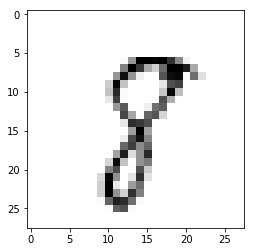

In [103]:
# Random img in the test set
test_img = test_dataset[random.randint(0, len(test_dataset))][0]
plt.imshow(test_img.reshape([image_width,image_width]),cmap='binary')
img_star = test_img.reshape([1,image_width*image_width])

In [104]:
gamma = 0.0007;
steps = 20000;
init = 3
min_loss = 10000;
xmin     = 0;

In [ ]:
for j in range(init):
    xk = Variable(10*torch.randn(xstar.size()), requires_grad=True)
    for i in range(steps):
        Gxk = generator(xk);
        l2_loss_var = ((Gxk-img_star).norm())**2
        l2_loss_var.backward()
        xk.data -= gamma*xk.grad.data
        xk.grad.data.zero_();
    print('Init: ', j+1, '\nloss: ', l2_loss_var.detach().numpy());
    #print('|x^star - xk|', (xstar-xk).norm().detach().numpy());
    print()
    if(l2_loss_var < min_loss):
        xmin = xk
        
pct_min = generator(xmin)
plt.imshow(pct_min.detach().numpy().reshape(28,28),  cmap='Greys')

Init:  1 
loss:  875.9489

